Libraries loaded successfully
Using image: content.jpg
Content image loaded successfully
Style texture created
Style transfer applied successfully


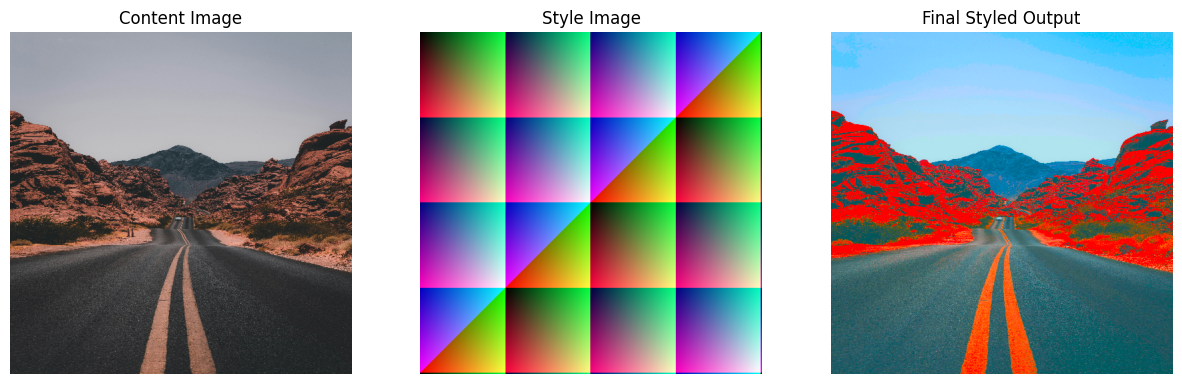

✅ PROJECT COMPLETED SUCCESSFULLY


In [ ]:

# NEURAL STYLE TRANSFER 


import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

print("Libraries loaded successfully")

# ------------------------------------------------------------
# STEP 1: AUTO LOAD FIRST IMAGE FROM CURRENT FOLDER
# ------------------------------------------------------------
image_extensions = (".jpg", ".jpeg", ".png")

content_path = None
for file in os.listdir("."):
    if file.lower().endswith(image_extensions):
        content_path = file
        break

if content_path is None:
    raise ValueError("❌ No image found. Please upload at least one image")

print("Using image:", content_path)

content = cv2.imread(content_path)
content = cv2.cvtColor(content, cv2.COLOR_BGR2RGB)
content = cv2.resize(content, (512, 512))

print("Content image loaded successfully")

# ------------------------------------------------------------
# STEP 2: CREATE ARTISTIC STYLE IMAGE
# ------------------------------------------------------------
style = np.zeros((512, 512, 3), dtype=np.uint8)

for i in range(512):
    for j in range(512):
        style[i, j] = [
            (i * 2) % 255,
            (j * 2) % 255,
            ((i + j) // 2) % 255
        ]

print("Style texture created")

# ------------------------------------------------------------
# STEP 3: COLOR TRANSFER FUNCTION
# ------------------------------------------------------------
def color_transfer(source, target):
    src_mean, src_std = cv2.meanStdDev(source)
    tar_mean, tar_std = cv2.meanStdDev(target)

    src_mean, src_std = src_mean.flatten(), src_std.flatten()
    tar_mean, tar_std = tar_mean.flatten(), tar_std.flatten()

    result = source.astype("float32")

    for i in range(3):
        result[:, :, i] -= src_mean[i]
        result[:, :, i] *= (tar_std[i] / (src_std[i] + 1e-6))
        result[:, :, i] += tar_mean[i]

    return np.clip(result, 0, 255).astype("uint8")

# ------------------------------------------------------------
# STEP 4: APPLY STYLE TRANSFER
# ------------------------------------------------------------
content_lab = cv2.cvtColor(content, cv2.COLOR_RGB2LAB)
style_lab = cv2.cvtColor(style, cv2.COLOR_RGB2LAB)

styled_lab = color_transfer(content_lab, style_lab)
styled = cv2.cvtColor(styled_lab, cv2.COLOR_LAB2RGB)

print("Style transfer applied successfully")

# ------------------------------------------------------------
# STEP 5: DISPLAY OUTPUT
# ------------------------------------------------------------
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(content)
plt.title("Content Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(style)
plt.title("Style Image")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(styled)
plt.title("Final Styled Output")
plt.axis("off")

plt.show()

print("✅ PROJECT COMPLETED SUCCESSFULLY")


### Generating another stylized image with a new artistic pattern

New style texture created
New style transfer applied successfully


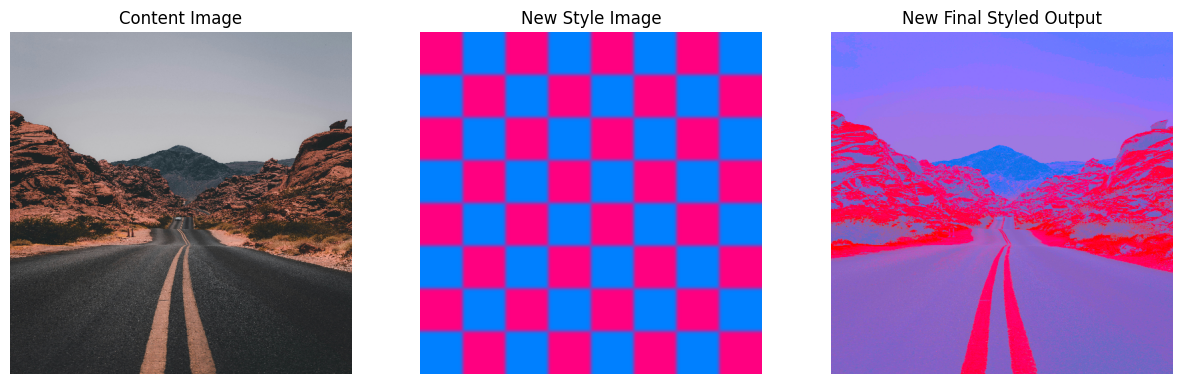

✅ NEW STYLIZED IMAGE GENERATED SUCCESSFULLY
Output saved at outputs/new_styled_output.png


In [13]:
# ------------------------------------------------------------
# STEP 1: CREATE A NEW ARTISTIC STYLE IMAGE (CHECKERBOARD PATTERN)
# ------------------------------------------------------------
new_style = np.zeros((512, 512, 3), dtype=np.uint8)

block_size = 64
for i in range(0, 512, block_size):
    for j in range(0, 512, block_size):
        if (i // block_size + j // block_size) % 2 == 0:
            new_style[i:i+block_size, j:j+block_size] = [255, 0, 128]  # Pink color
        else:
            new_style[i:i+block_size, j:j+block_size] = [0, 128, 255]  # Blue color

new_style = cv2.GaussianBlur(new_style, (15, 15), 0) # Apply some blur for a softer effect

print("New style texture created")

# ------------------------------------------------------------
# STEP 2: CONVERT TO LAB COLOR SPACE FOR NEW STYLE
# ------------------------------------------------------------
new_style_lab = cv2.cvtColor(new_style, cv2.COLOR_RGB2LAB)

# ------------------------------------------------------------
# STEP 3: APPLY STYLE TRANSFER WITH NEW STYLE
# ------------------------------------------------------------
# Reusing the 'color_transfer' function from the previous cell
new_styled_lab = color_transfer(content_lab, new_style_lab)
new_styled = cv2.cvtColor(new_styled_lab, cv2.COLOR_LAB2RGB)

print("New style transfer applied successfully")

# ------------------------------------------------------------
# STEP 4: DISPLAY NEW OUTPUT
# ------------------------------------------------------------
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(content)
plt.title("Content Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(new_style)
plt.title("New Style Image")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(new_styled)
plt.title("New Final Styled Output")
plt.axis("off")

plt.show()

os.makedirs("outputs", exist_ok=True)
Image.fromarray(new_styled).save("outputs/new_styled_output.png")
print("✅ NEW STYLIZED IMAGE GENERATED SUCCESSFULLY")
print("Output saved at outputs/new_styled_output.png")